# Capstone Two: EDA

In this step for my capstone, I am going to examine the data to find some initial hypotheses and relationships in the data. 

In [95]:
# import libraries and format output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import os
from library.sb_utils import save_file
pd.options.display.float_format = '{:.2f}'.format

In [96]:
df = pd.read_csv("./data/training_data_cleaned.csv")

In [97]:
df.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-05-01,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-06-01,0,25,2554,1709.05,1.00,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,2013-10-01,0,25,2564,349.00,1.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,2013-02-01,0,25,2565,549.00,1.00,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,2013-04-01,0,25,2572,239.00,1.00,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,2013-11-01,0,25,2572,299.00,1.00,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,2013-03-01,0,25,2573,299.00,3.00,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [98]:
# The goal is to predict total sales for every product and store
# we should start by examining the data types to learn what kind of analysis we can reasonably perform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935843 entries, 0 to 2935842
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


Of the object categories (date, item_name, item_category_name, shop_name), all but date are not going to be useful in this. Thus, I am going to drop the item_name, item_category_name, shop_name columns and convert datre into datetime. 

In [99]:
df.drop(['item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)

In [100]:
df['date'] = pd.to_datetime(df.date, format='%Y-%d-%m', errors='coerce')

In [101]:
df.dropna(inplace=True)

In [102]:
df.dtypes

date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
item_category_id             int64
dtype: object

In [103]:
df.date_block_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

I want to start to get the monthly metrics of each item's sales and the monthly metric for each store's sales per month; that is, for each month block number, what is the sales per item and sales per store? 

In [104]:
grouped = pd.DataFrame(df.groupby(['shop_id', 'date_block_num', 'date'])['item_cnt_day'].sum().reset_index())

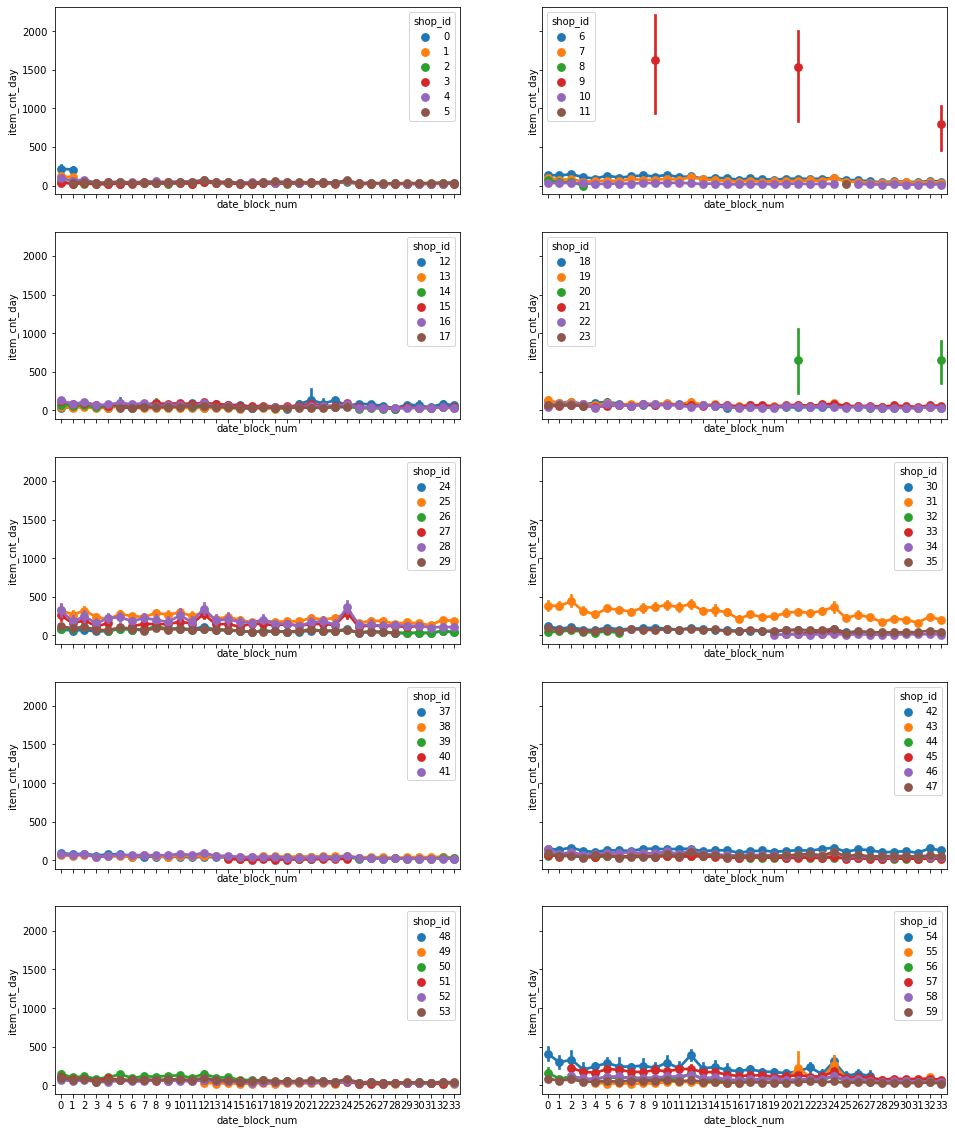

In [105]:
from math import ceil
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

This is incredibly useful! We can see that some items onlt sold for certain months and then did not sell again; some are declining consistently; there is a peak near the holiday season. Adding month and year data will help find patterns like holiday seasonal purchases. 

In [106]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%m') for d in df.date]
months = df.month.unique()
years = df['year'].unique()

print(months)
print(years)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
[2013 2014 2015]


What are the total sales?

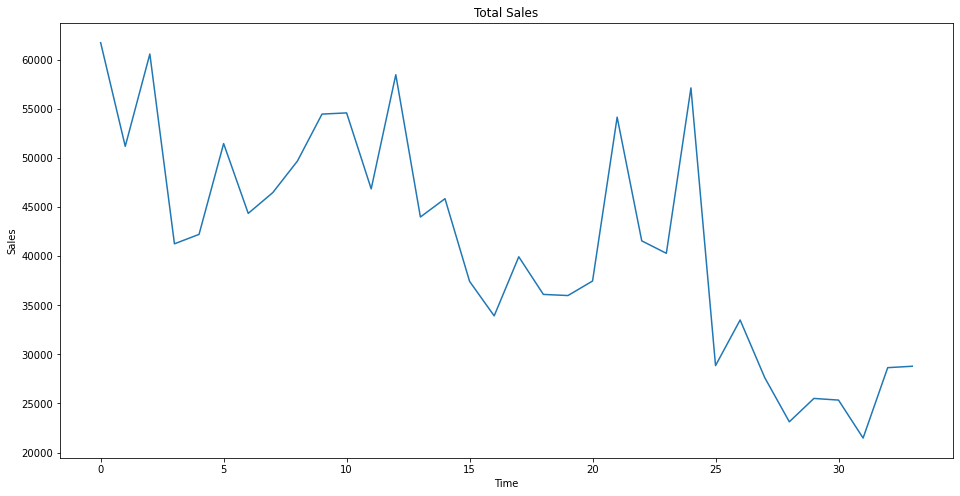

In [107]:
ts=df.groupby(["date_block_num"])["item_cnt_day"].sum()
plt.figure(figsize=(16,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

In [108]:
df = df.sort_values(by='date')

We are trying to predict the total sales for every product and store for the next month.

The important features are going to be sales in next month - date block 34. 

We want to find the sales per month for each item and each store; these are the sum of the item cnt day for each of the two groups: (date block, shop_id) and (date block, item_id). Let's find the means. 

In [109]:
grouped['year'] = [d.year for d in grouped.date]
grouped['month'] = [d.strftime('%m') for d in grouped.date]
months = grouped.month.unique()
years = grouped['year'].unique()

print(months)
print(years)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
[2013 2014 2015]


In [110]:
grouped.columns = ['shop_id','date_block_num','date','monthly_sales','year', 'month']

In [111]:
grouped.head()

,shop_id,date_block_num,date,monthly_sales,year,month
0,0,0,2013-01-03,203.00,2013,01
1,0,0,2013-01-04,352.00,2013,01
2,0,0,2013-01-05,292.00,2013,01
3,0,0,2013-01-06,209.00,2013,01
4,0,0,2013-01-07,132.00,2013,01


In [112]:
grouped = grouped.set_index(grouped['date'])
del grouped['date']

In [113]:
y = grouped['monthly_sales'].resample('MS').mean()

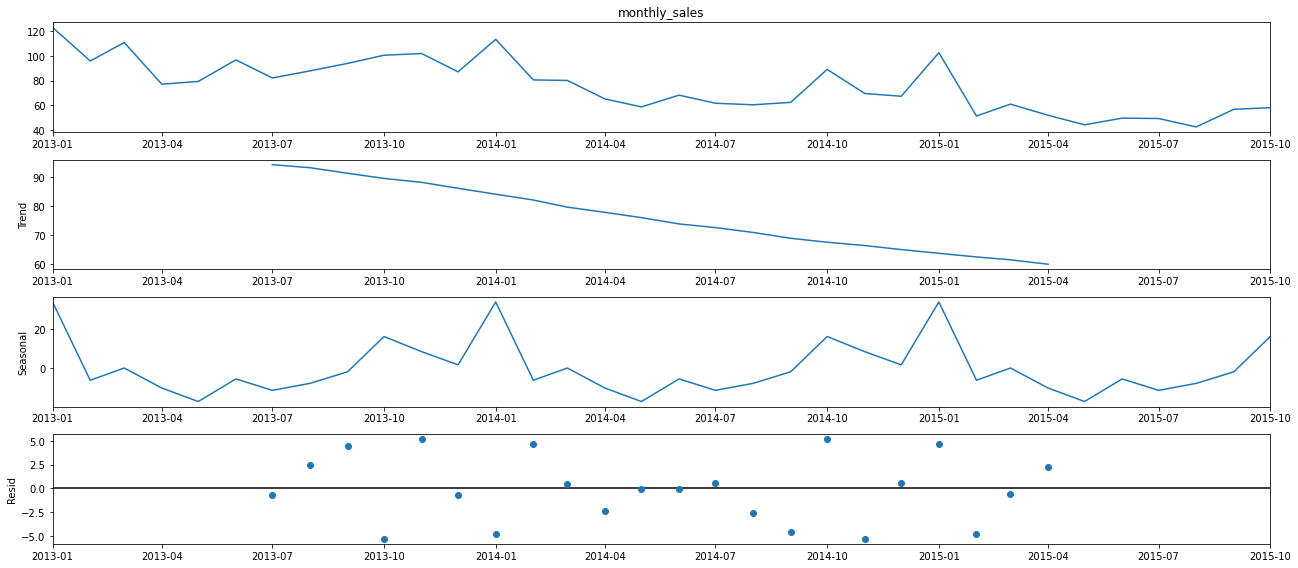

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Definitely seasonal, and tredning downward. 

In [115]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:382.4084253538856
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:230.7132697984965
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:190.57888235413895
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:74.44522958233807
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:158.12188880252057
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:144.05172356313454
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:80.11775050223392
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:75.31900173174574


C:\Users\cfran\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:340.41055389431824
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:203.96849638964443
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:173.476218361205
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:66.05004360946833
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:157.82371004371365
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:134.31455715871624
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:80.95404402149882
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:65.87871041411978
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:276.05651429344056
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:168.5407539851223
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:160.6977418885559
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:63.91983479414165
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:168.46154947058534
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:162.58587613380297
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:73.92102043014944
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:65.91797818690998
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:259.4861791742924
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:159.34048281277498
ARI

C:\Users\cfran\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:54.70541115060863
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:286.0651073555882
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:180.491663883963
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:168.71796203910023
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:75.89305784536035
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:146.19337051206637
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:144.7949818019249
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:73.93233199916855
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:77.823056676533
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:266.433704024721
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:165.2003301630471
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:149.777271203628
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:61.411160650053986
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:142.48558265921247
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:136.2123118224212
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:70.149575902774
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:63.40738360478446
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:267.5451875115707
ARIMA(1, 1, 0

The lowest AIC is ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:53.40142261503432.
Therefore we should consider this to be optimal option.

In [119]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\cfran\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\cfran\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4277      0.521     -0.821      0.412      -1.448       0.593
ma.L1         -0.7448      0.305     -2.439      0.015      -1.343      -0.146
ar.S.L12      -0.9711     36.752     -0.026      0.979     -73.004      71.062
ma.S.L12       0.8566     91.981      0.009      0.993    -179.424     181.137
sigma2        53.8765   2930.350      0.018      0.985   -5689.503    5797.256


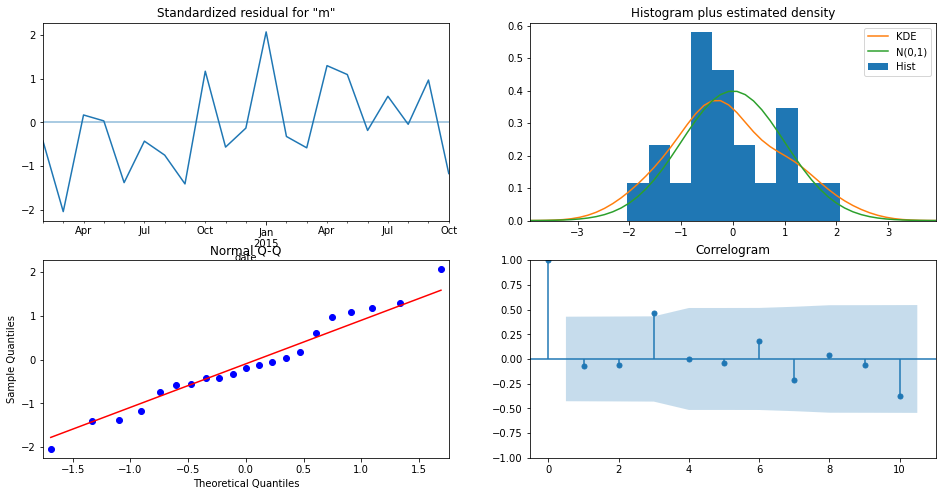

In [120]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

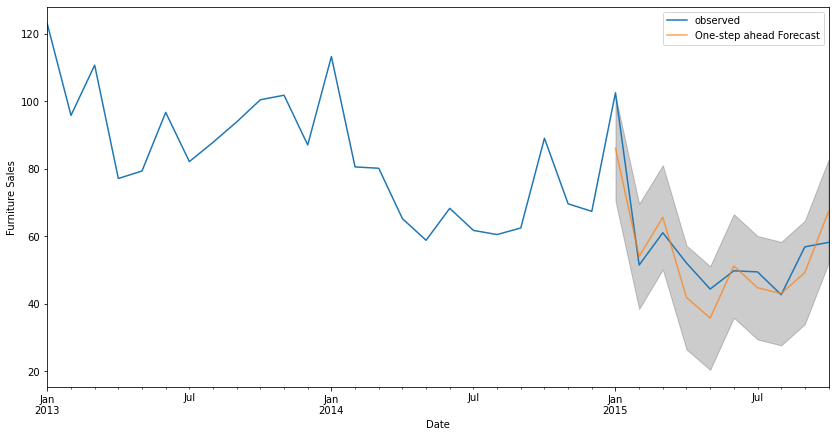

In [123]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [124]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 64.35


In [125]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 8.02


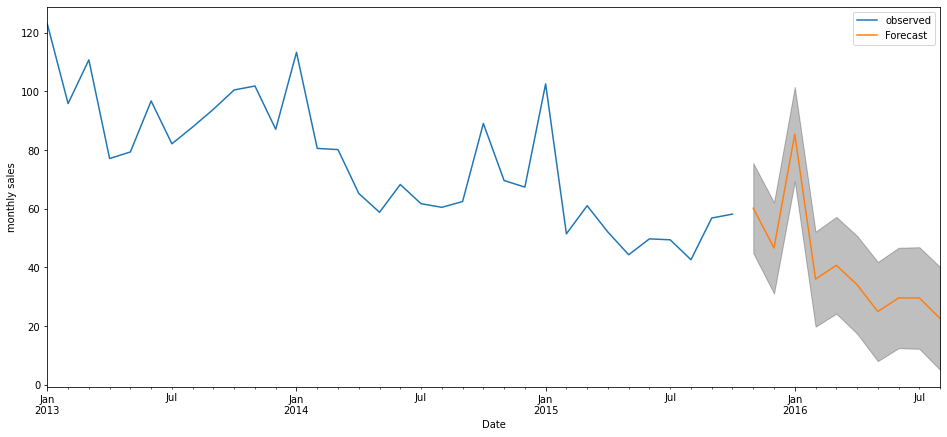

In [132]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(16, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('monthly sales')
plt.legend()
plt.show()

We clearly accounted for seasonality 